In [67]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [69]:
!pip install category_encoders
!pip install graphviz

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
from sklearn import tree
from sklearn.metrics import accuracy_score



In [71]:
data='/kaggle/input/car-evaluation-data-set/car_evaluation.csv'
df=pd.read_csv(data)
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [72]:
df.columns

Index(['vhigh', 'vhigh.1', '2', '2.1', 'small', 'low', 'unacc'], dtype='object')

In [73]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
df.columns=col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


#observations
-all are object-encoding required
-no null values

In [75]:
df.shape

(1727, 7)

In [76]:
col_names=['buying','maint','doors','persons','lug_boot','safety','class']
for col in col_names:
    print(col)
    print(df[col].unique())
    print(df[col].value_counts())

buying
['vhigh' 'high' 'med' 'low']
buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
['vhigh' 'high' 'med' 'low']
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
['2' '3' '4' '5more']
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
['2' '4' 'more']
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
['small' 'med' 'big']
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
['med' 'high' 'low']
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
['unacc' 'acc' 'vgood' 'good']
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [77]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

<Axes: ylabel='count'>

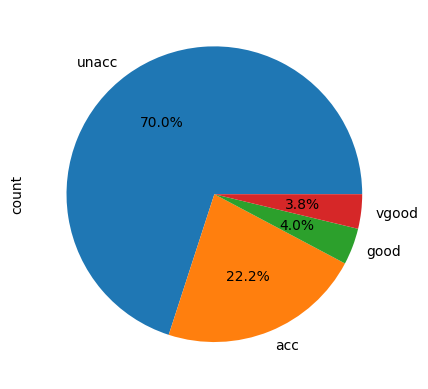

In [78]:
df['class'].value_counts().plot(kind="pie",autopct='%1.1f%%')

In [79]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [80]:
x=df.drop(['class'],axis=1)
y=df['class']

In [81]:

encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
x_en=encoder.fit_transform(x)

In [82]:
le=LabelEncoder()
y_en=le.fit_transform(y)

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x_en,y_en,test_size=0.33,random_state=42)

In [84]:
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

#model evulvotion


In [85]:
y_pred_gini=clf_gini.predict(x_test)
print("model accuracy score with citerion gini index:{0:0.4f}".
      format(accuracy_score(y_test,y_pred_gini)))

model accuracy score with citerion gini index:0.8053


In [86]:
cm=confusion_matrix(y_test,y_pred_gini)
print('Confusion Matrix \n\n',cm)

Confusion Matrix 

 [[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]


In [87]:
classes_name=le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [88]:
cm_df=pd.DataFrame(cm,
                  index=classes_name,
                  columns=classes_name)
cm_df

,acc,good,unacc,vgood
acc,71,0,56,0
good,18,0,0,0
unacc,11,0,388,0
vgood,26,0,0,0


<Axes: >

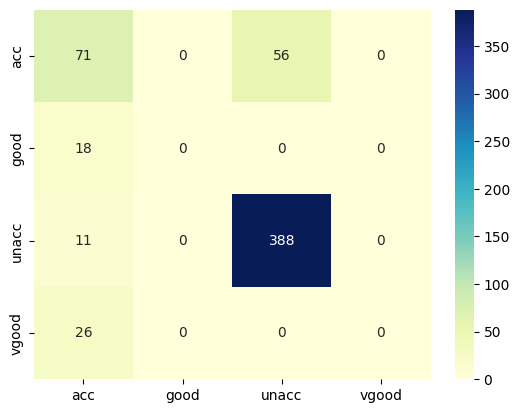

In [89]:
sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')

In [90]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       127
           1       0.00      0.00      0.00        18
           2       0.87      0.97      0.92       399
           3       0.00      0.00      0.00        26

    accuracy                           0.81       570
   macro avg       0.36      0.38      0.37       570
weighted avg       0.74      0.81      0.77       570



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [91]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
x=df.drop(['class'],axis=1)
y=df['class']
ran=RandomUnderSampler()
x_rs,y_rs=ran.fit_resample(x,y)

In [92]:
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
x_en=encoder.fit_transform(x_rs)

In [93]:
le=LabelEncoder()
y_en=le.fit_transform(y_rs)

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x_en,y_en,test_size=0.33,random_state=42)

In [95]:
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [96]:
y_pred_gini=clf_gini.predict(x_test)
print("model accuracy score with citerion gini index:{0:0.4f}".
      format(accuracy_score(y_test,y_pred_gini)))

model accuracy score with citerion gini index:0.5233


In [97]:
cm=confusion_matrix(y_test,y_pred_gini)
print('Confusion Matrix \n\n',cm)

Confusion Matrix 

 [[ 9  0  0  8]
 [15  0  0 12]
 [ 5  0 15  1]
 [ 0  0  0 21]]


In [98]:
classes_name=le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [99]:
cm_df=pd.DataFrame(cm,
                  index=classes_name,
                  columns=classes_name)
cm_df

,acc,good,unacc,vgood
acc,9,0,0,8
good,15,0,0,12
unacc,5,0,15,1
vgood,0,0,0,21


<Axes: >

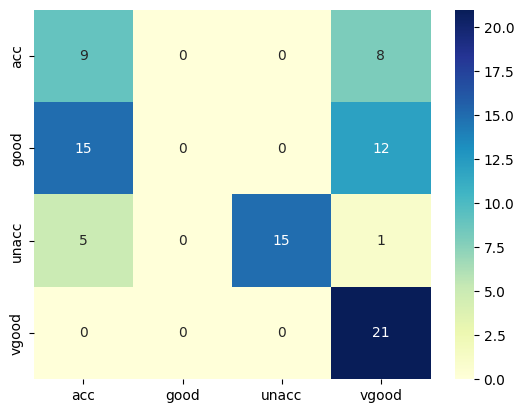

In [100]:
sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')

In [101]:
print(classification_report(y_test,y_pred_gini))


              precision    recall  f1-score   support

           0       0.31      0.53      0.39        17
           1       0.00      0.00      0.00        27
           2       1.00      0.71      0.83        21
           3       0.50      1.00      0.67        21

    accuracy                           0.52        86
   macro avg       0.45      0.56      0.47        86
weighted avg       0.43      0.52      0.44        86



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [102]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
x=df.drop(['class'],axis=1)
y=df['class']
ran=RandomOverSampler()
x_rs,y_rs=ran.fit_resample(x,y)

In [103]:
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
x_en=encoder.fit_transform(x_rs)

In [104]:
le=LabelEncoder()
y_en=le.fit_transform(y_rs)

In [105]:
x_train,x_test,y_train,y_test=train_test_split(x_en,y_en,test_size=0.33,random_state=42)

In [106]:
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [107]:
y_pred_gini=clf_gini.predict(x_test)
print("model accuracy score with citerion gini index:{0:0.4f}".
      format(accuracy_score(y_test,y_pred_gini)))

model accuracy score with citerion gini index:0.6629


In [108]:
cm=confusion_matrix(y_test,y_pred_gini)
print('Confusion Matrix \n\n',cm)

Confusion Matrix 

 [[183 131   0  89]
 [  0 213   0 166]
 [ 74  40 262  38]
 [  0   0   0 400]]


In [109]:
classes_name=le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [110]:
import imblearn
from imblearn.combine import SMOTEENN
x=df.drop(['class'],axis=1)
y=df['class']
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','lug_boot','safety'])
x_en=encoder.fit_transform(x)
le=LabelEncoder()
y_en=le.fit_transform(y)
ran=SMOTEENN()
x_rs,y_rs=ran.fit_resample(x_en,y_en)

In [111]:
x_train,x_test,y_train,y_test=train_test_split(x_rs,y_rs,test_size=0.33,random_state=42)

In [112]:
clf_gini=DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [113]:
y_pred_gini=clf_gini.predict(x_test)
print("model accuracy score with citerion gini index:{0:0.4f}".
      format(accuracy_score(y_test,y_pred_gini)))

model accuracy score with citerion gini index:0.8122


In [114]:
cm=confusion_matrix(y_test,y_pred_gini)
print('Confusion Matrix \n\n',cm)

Confusion Matrix 

 [[237  63   0  42]
 [  0 347   0  34]
 [ 59  20 137  37]
 [  0   0   0 382]]


In [115]:
classes_name=le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [116]:
cm_df=pd.DataFrame(cm,
                  index=classes_name,
                  columns=classes_name)
cm_df

,acc,good,unacc,vgood
acc,237,63,0,42
good,0,347,0,34
unacc,59,20,137,37
vgood,0,0,0,382


<Axes: >

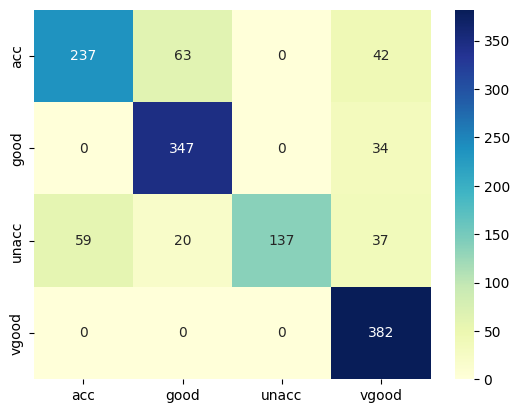

In [117]:
sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')

In [118]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       342
           1       0.81      0.91      0.86       381
           2       1.00      0.54      0.70       253
           3       0.77      1.00      0.87       382

    accuracy                           0.81      1358
   macro avg       0.84      0.79      0.79      1358
weighted avg       0.83      0.81      0.80      1358



[Text(0.4230769230769231, 0.875, 'x[0] <= 2.5\ngini = 0.745\nsamples = 2755\nvalue = [639, 740, 567, 809]'),
 Text(0.15384615384615385, 0.625, 'x[3] <= 1.5\ngini = 0.498\nsamples = 696\nvalue = [326, 0, 370, 0]'),
 Text(0.07692307692307693, 0.375, 'gini = 0.0\nsamples = 165\nvalue = [0, 0, 165, 0]'),
 Text(0.23076923076923078, 0.375, 'x[1] <= 1.5\ngini = 0.474\nsamples = 531\nvalue = [326, 0, 205, 0]'),
 Text(0.15384615384615385, 0.125, 'gini = 0.0\nsamples = 96\nvalue = [0, 0, 96, 0]'),
 Text(0.3076923076923077, 0.125, 'gini = 0.376\nsamples = 435\nvalue = [326, 0, 109, 0]'),
 Text(0.6923076923076923, 0.625, 'x[5] <= 1.5\ngini = 0.684\nsamples = 2059\nvalue = [313, 740, 197, 809]'),
 Text(0.5384615384615384, 0.375, 'x[1] <= 2.5\ngini = 0.493\nsamples = 660\nvalue = [197, 425, 38, 0]'),
 Text(0.46153846153846156, 0.125, 'gini = 0.294\nsamples = 162\nvalue = [133, 0, 29, 0]'),
 Text(0.6153846153846154, 0.125, 'gini = 0.255\nsamples = 498\nvalue = [64, 425, 9, 0]'),
 Text(0.8461538461538

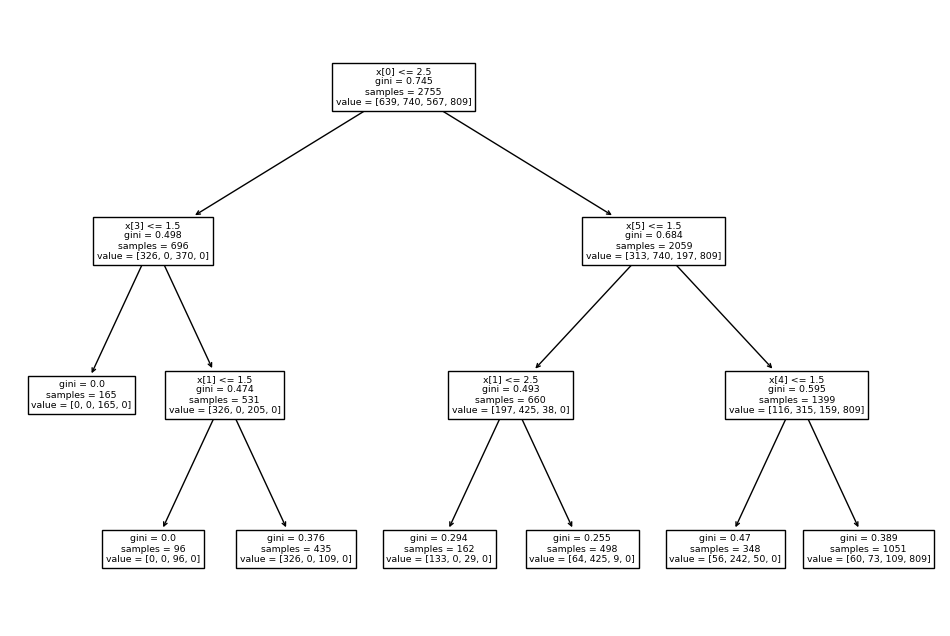

In [119]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train,y_train))

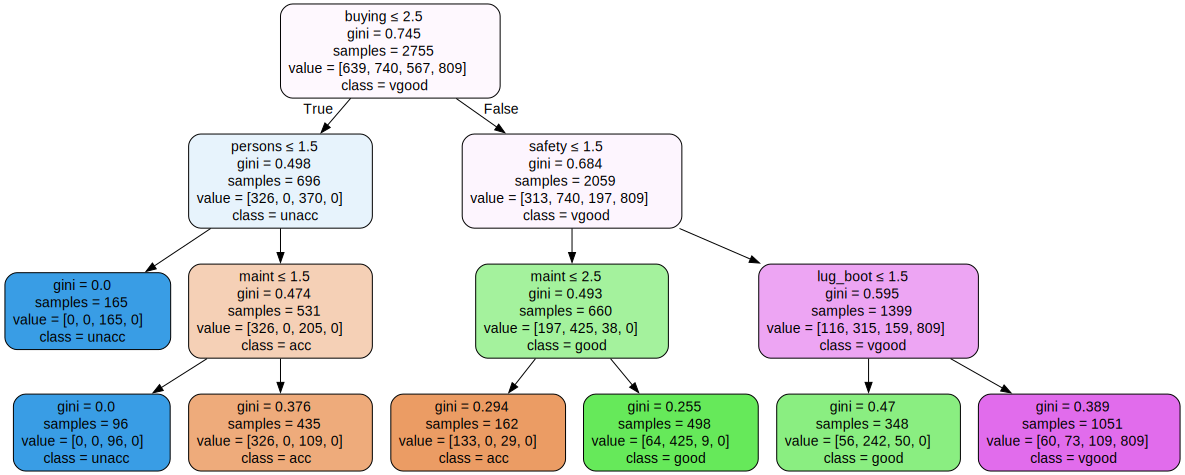

In [120]:
import graphviz
dot_data=tree.export_graphviz(clf_gini,out_file=None,
                             feature_names=x_train.columns,
                             class_names=classes_name,
                             filled=True,rounded=True,
                             special_characters=True)
graph=graphviz.Source(dot_data)
graph

In [121]:
from sklearn.model_selection import GridSearchCV 
params={
    'max_depth':[2,3,4,5,8,10],
    'min_samples_leaf':[2,10,20,50,100],
    'criterion':["gini","entropy"]
}


In [122]:
grid_search=GridSearchCV(estimator=clf_gini,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")

In [123]:
grid_search.fit(x_train,y_train)

Fitting 4 folds for each of 60 candidates, totalling 240 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=3, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 8, 10],
                         'min_samples_leaf': [2, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [124]:
best_par=grid_search.best_estimator_

In [137]:
def evaluate_model(dt_classifier):
    print("Train accuracy:",
          accuracy_score(y_train,dt_classifier.predict(x_train)))
    print("Train Confusion matrix:")
    print(confusion_matrix(y_train,dt_classifier.predict(x_train)))
    print("-"*50)
    print("Test Accuracy:",
          accuracy_score(y_test,dt_classifier.predict(x_test)))
    print("Test Confusion matrix:")
    print(confusion_matrix(y_test,dt_classifier.predict(x_test)))
    cm=confusion_matrix(y_test,dt_classifier.predict(x_test))
    cm_df=pd.DataFrame(cm,
                      index=classes_name,
                      columns=classes_name)
    sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')
    print(classification_report(y_test,dt_classifier.predict(x_test)))
              

Train accuracy: 0.9949183303085299
Train Confusion matrix:
[[628   6   0   5]
 [  0 740   0   0]
 [  3   0 564   0]
 [  0   0   0 809]]
--------------------------------------------------
Test Accuracy: 0.9874815905743741
Test Confusion matrix:
[[330   6   0   6]
 [  0 381   0   0]
 [  5   0 248   0]
 [  0   0   0 382]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       342
           1       0.98      1.00      0.99       381
           2       1.00      0.98      0.99       253
           3       0.98      1.00      0.99       382

    accuracy                           0.99      1358
   macro avg       0.99      0.99      0.99      1358
weighted avg       0.99      0.99      0.99      1358



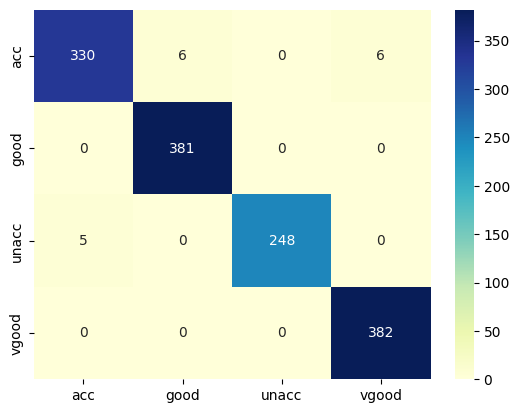

In [138]:
evaluate_model(best_par)

In [140]:
best_par.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=2,
                       random_state=0)

In [141]:
  print("Test Accuracy:",
          accuracy_score(y_test,best_par.predict(x_test)))

Test Accuracy: 0.9874815905743741


In [142]:
import joblib
filename='finalized_model.joblib'
joblib.dump(best_par,filename)

['finalized_model.joblib']

In [144]:
from IPython.display import FileLink
FileLink(r'finalized_model.joblib')

/kaggle/working/finalized_model.joblib